In [1]:
# test a/b skutecznosci konweresji rklamy
# H0 = ma taka sama klikalnośc jak stara
# h1 = ma inna klikkalnośc jak stara


# alpha = 0.05

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

test_data_df = pd.read_csv("https://raw.githubusercontent.com/sapkos/CodebrainersData/master/data/ab_data.csv")

In [3]:
test_data_df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [4]:
pd.crosstab(test_data_df['group'], test_data_df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [5]:
# czesc grupy widziała od razu nowa reklame trzeba usunać 

In [18]:
#czyszczenie danych z geupy kontrolnej
# b


In [21]:
# control_df = test_data_df[test_data_df['group'] == 'treatment']
# control_df = control_df[['user_id', 'converted', 'group']].drop_duplicates()

In [22]:
# control_exposed_df = control_df.merge(exposed_df, on='user_id')
# control_exposed_df

,user_id,converted_x,group_x,converted_y,group_y
0,661590,0,treatment,0,treatment
1,853541,0,treatment,0,treatment
2,679687,1,treatment,1,treatment
3,817355,1,treatment,1,treatment
4,839785,1,treatment,1,treatment
...,...,...,...,...,...
146942,677163,0,treatment,0,treatment
146943,925675,0,treatment,0,treatment
146944,643562,0,treatment,0,treatment
146945,822004,0,treatment,0,treatment


In [10]:
# sql join, left anti join

In [26]:
# control_df = control_df.merge(exposed_df, how='left', on='user_id', indicator=True)
# control_df = control_df.drop(control_df[control_df['_merge'] == 'both'].index)

ValueError: Cannot use name of an existing column for indicator column

C:\Users\mrgrz\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:840: RuntimeWarning: invalid value encountered in true_divide
  prop = count * 1. / nobs
C:\Users\mrgrz\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:856: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)


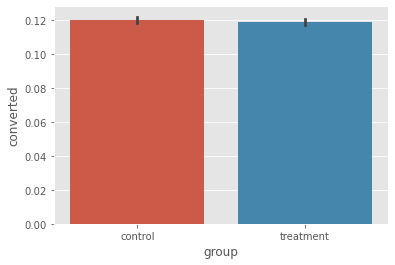

In [24]:
# exposed_df.groupby('group')['converted'].agg(['mean', 'std'])
# control_df.groupby('group_x')['converted_x'].agg(['mean', 'std'])

# sns.barplot(x=test_data_df['group'], y=test_data_df['converted'])
# from statsmodels.stats.proportion import proportions_ztest

# control_results = control_df['converted_x']
# exposed_results = exposed_df['converted']

# n_con = control_results.count()
# n_exp = exposed_results.count()

# successes = [control_results.sum(), exposed_results.sum()]

# z_stat, p_val = proportions_ztest(successes, [n_con, n_exp])

In [27]:
p_val

nan

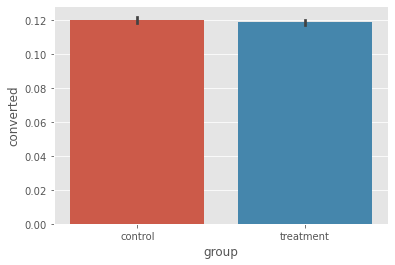

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

test_data_df = pd.read_csv("https://raw.githubusercontent.com/sapkos/CodebrainersData/master/data/ab_data.csv")

pd.crosstab(test_data_df['group'], test_data_df['landing_page'])

exposed_df = test_data_df[test_data_df['group'] == 'treatment']
exposed_df = exposed_df[['user_id', 'converted', 'group']].drop_duplicates()



exposed_df = test_data_df[test_data_df['group'] == 'treatment']
exposed_df = exposed_df[['user_id', 'converted', 'group']].drop_duplicates()

control_df = test_data_df[test_data_df['group'] == 'control']
control_df = control_df[['user_id', 'converted', 'group']].drop_duplicates()

control_exposed_df = control_df.merge(exposed_df, on='user_id')

control_df = control_df.merge(exposed_df, how='left', on='user_id', indicator=True)
control_df = control_df.drop(control_df[control_df['_merge'] == 'both'].index)




exposed_df.groupby('group')['converted'].agg(['mean', 'std'])
control_df.groupby('group_x')['converted_x'].agg(['mean', 'std'])

sns.barplot(x=test_data_df['group'], y=test_data_df['converted'])

from statsmodels.stats.proportion import proportions_ztest

control_results = control_df['converted_x']
exposed_results = exposed_df['converted']

n_con = control_results.count()
n_exp = exposed_results.count()

successes = [control_results.sum(), exposed_results.sum()]

z_stat, p_val = proportions_ztest(successes, [n_con, n_exp])

In [35]:
p_val

0.22377082589246533

In [34]:
# pval wieksze od zał nie odrzucamy H0


